<a href="https://colab.research.google.com/github/Aravinda89/fastai_bootcamp/blob/main/BC2_1_MNIST_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 7.3MB/s 
     |████████████████████████████████| 51kB 6.5MB/s 
     |████████████████████████████████| 204kB 14.5MB/s 
     |████████████████████████████████| 1.2MB 23.5MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *
import matplotlib.pyplot as plt
import numpy as np
from random import shuffle

matplotlib.rc('image', cmap='Greys')

In [3]:
#Load full MNIST dataset

path = untar_data(URLs.MNIST)    # Full dataset (0s to 9s)
Path.BASE_PATH = path

In [4]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [5]:
(path/'training').ls()

(#10) [Path('training/4'),Path('training/8'),Path('training/5'),Path('training/0'),Path('training/9'),Path('training/3'),Path('training/6'),Path('training/1'),Path('training/2'),Path('training/7')]

In [6]:
len((path/'training/5').ls())

5421

In [7]:
paths_dict = {}         # Create an empty dictionary to hold the paths list for each digit
num_imgs_dict = {}        # Number of images for each class

for i in range(10):
    paths_dict[i] = (path/'training'/f"{i}").ls().sorted()   # add the list of path for digit i to the dict
    num_imgs_dict[i] = len((path/'training'/f"{i}").ls())   # Get number of images for each class

paths_dict

{0: (#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...],
 1: (#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...],
 2: (#5958) [Path('training/2/10009.png'),Path('training/2/10016.png'),Path('training/2/10024.png'),Path('training/2/10029.png'),Path('training/2/10072.png'),Path('training/2/10073.png'),Path('training/2/10075.png'),Path('training/2/10078.png'),Path('training/2/10081.png'),Path('training/2/10082.png')...],
 3: (#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/

In [8]:
for i in range(10):
    img_paths = paths_dict[i][10]
    img = Image.open(img_paths)
    display(img)

In [9]:
# Number of images for each class
num_imgs_dict

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

([<matplotlib.axis.XTick at 0x7fa07878ee50>,
 <a list of 10 Text major ticklabel objects>)

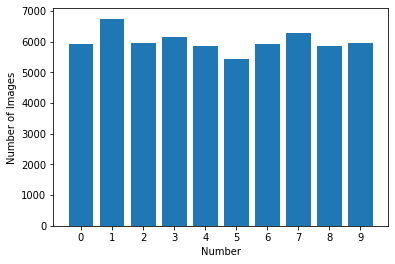

In [10]:
plt.bar(num_imgs_dict.keys(), num_imgs_dict.values(), label="Distribution")
plt.ylabel ('Number of Images')
plt.xlabel ('Number')
plt.xticks(list(num_imgs_dict.keys()))

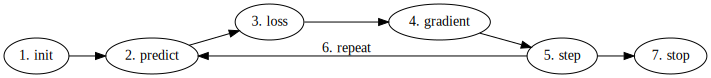

In [11]:
# Stochastic Gradient Descent (SGD)
gv('''
"1. init"->"2. predict"->"3. loss"->"4. gradient"->"5. step"->"7. stop"
"5. step"->"2. predict"[label="6. repeat"]
''')

In [ ]:
# Prepare datasets and dataloaders

In [12]:
paths_dict

{0: (#5923) [Path('training/0/1.png'),Path('training/0/1000.png'),Path('training/0/10005.png'),Path('training/0/10010.png'),Path('training/0/10022.png'),Path('training/0/10025.png'),Path('training/0/10026.png'),Path('training/0/10045.png'),Path('training/0/10069.png'),Path('training/0/10071.png')...],
 1: (#6742) [Path('training/1/10006.png'),Path('training/1/10007.png'),Path('training/1/1002.png'),Path('training/1/10020.png'),Path('training/1/10027.png'),Path('training/1/1003.png'),Path('training/1/10040.png'),Path('training/1/10048.png'),Path('training/1/10058.png'),Path('training/1/10067.png')...],
 2: (#5958) [Path('training/2/10009.png'),Path('training/2/10016.png'),Path('training/2/10024.png'),Path('training/2/10029.png'),Path('training/2/10072.png'),Path('training/2/10073.png'),Path('training/2/10075.png'),Path('training/2/10078.png'),Path('training/2/10081.png'),Path('training/2/10082.png')...],
 3: (#6131) [Path('training/3/10.png'),Path('training/3/10000.png'),Path('training/

In [13]:
# Open images in each class , create tensor dict
tensors_dict = {}

for i in range(10):
    tensors_dict[i] = [tensor(Image.open(o)) for o in paths_dict[i]]

In [14]:
tensors_dict[0][0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  54, 227, 253, 252, 239, 2

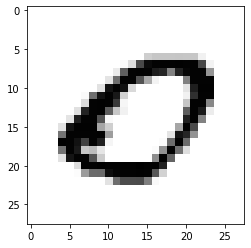

In [15]:
plt.imshow( tensors_dict[0][0].permute(1, 0))

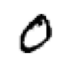

In [16]:
show_image(tensors_dict[0][0])

In [22]:
tensors_dict[0][0].shape

torch.Size([28, 28])

In [23]:
# Calculate the stacked tensor for each of the digit and store that tensor in a dictionary index by digit
stacked_tensors_dict = {}

for digit, img_tensor in tensors_dict.items():
    stacked_tensors_dict[digit] = torch.stack(img_tensor).float()/255

In [24]:
stacked_tensors_dict[0].shape

torch.Size([5923, 28, 28])

In [25]:
train_x = torch.cat([stacked_tensors_dict[i] for i in range(0,10)]).view(-1, 28*28)

In [26]:
train_x.shape

torch.Size([60000, 784])

In [27]:
stacked_tensors_dict[0].shape

torch.Size([5923, 28, 28])

In [28]:
stacked_tensors_dict[0].shape[0]

5923

In [29]:
# Returns a list of 10 sublists, where each sublist consists of as many times digit as the number of image in the category
l = [ [i] * stacked_tensors_dict[i].shape[0] for i in range(0,10) ]

# check the the total number of labels is equal to the numer of images
assert sum([len(sublist) for sublist in l]) == train_x.shape[0]

In [30]:
# Create a tensor based on the list of labels

label_list = []

for i in range(10):
    label_list.extend(l[i])

assert len(label_list) == train_x.shape[0]

In [31]:
train_y = torch.tensor(label_list).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

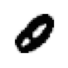

In [29]:
show_image(train_x[5].view(-1, 28,28))

In [32]:
train_y[0]

tensor([0])

In [33]:
dset = list(zip(train_x, train_y))

# Shuffle the dset so that digits are mixed
shuffle(dset)

In [34]:
x, y = dset[0]

In [35]:
x.shape

torch.Size([784])

In [36]:
y.shape

torch.Size([1])

In [37]:
stacked_tensors_dict[0].shape

torch.Size([5923, 28, 28])

In [38]:
valid_tensors_dict = {}

for digit, tnrs in stacked_tensors_dict.items():
  
    valid_tensors_dict[digit] = torch.stack([tensor(Image.open(o)) for o in (path/'testing'/f"{digit}").ls()])
    valid_tensors_dict[digit] = valid_tensors_dict[digit].float()/255

    print('shape for',digit, ':', valid_tensors_dict[digit].shape)

shape for 0 : torch.Size([980, 28, 28])
shape for 1 : torch.Size([1135, 28, 28])
shape for 2 : torch.Size([1032, 28, 28])
shape for 3 : torch.Size([1010, 28, 28])
shape for 4 : torch.Size([982, 28, 28])
shape for 5 : torch.Size([892, 28, 28])
shape for 6 : torch.Size([958, 28, 28])
shape for 7 : torch.Size([1028, 28, 28])
shape for 8 : torch.Size([974, 28, 28])
shape for 9 : torch.Size([1009, 28, 28])


In [39]:
valid_tensors_dict[0].shape

torch.Size([980, 28, 28])

In [40]:
valid_x = torch.cat([valid_tensors_dict[i] for i in range(0,10)]).view(-1, 28*28)

In [41]:
# Returns a list of 10 sublists, where each sublist consists of a as many times digit as the number of image in the category
l = [ [i] * valid_tensors_dict[i].shape[0] for i in range(0,10)]

In [42]:
# check the the total number of labels is equal to the numer of images
assert sum([len(sublist) for sublist in l]) == valid_x.shape[0] 
print(valid_x.shape)

torch.Size([10000, 784])


In [43]:
# Create a tensor based on the list of labels

label_list = []

for i in range(10):
    label_list.extend(l[i])
assert len(label_list) == valid_x.shape[0]

valid_y = torch.tensor(label_list).unsqueeze(1)
print(valid_y.shape)

valid_dset = list(zip(valid_x, valid_y))

torch.Size([10000, 1])


In [44]:
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

In [45]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

weights = init_params((28*28, 10))
bias = init_params(10)

weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [46]:
def linear(xb):
    outputs =  xb @ weights + bias
    probs = F.log_softmax(outputs, dim=1)
    return probs

def evaluate_preds(xb):
    probs = linear(xb)
    return probs.argmax(dim=1).unsqueeze(dim=1)

loss_fct = F.nll_loss

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    loss.backward()

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)

        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    """Determines how many of the predictions are actually correct"""
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

def validate_epoch(model):
    """Collects the accuracy from each element in the dataloader and displays it"""
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)


In [49]:
weights = init_params((28*28, 10))
bias = init_params(10)

params = weights, bias

lr = 1

train_epoch(linear, lr, params)

validate_epoch(evaluate_preds)

0.8416

In [50]:
n_epochs = 20

for i in range(n_epochs):
    train_epoch(linear, lr, params)

    if i%10 == 0:
        print(f"{i}:{validate_epoch(evaluate_preds):1.4f}", end=' ')
        
print(validate_epoch(evaluate_preds))

0:0.8668 10:0.8998 0.9094


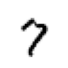

tensor([[7]])

In [51]:
img = valid_tensors_dict[7][957]
show_image(img)
plt.show()

evaluate_preds(img.view(28*28).unsqueeze(dim=0))

In [51]:
# ReLu and two layers

In [52]:
def init_params(size, std=1.0): 
  return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28, 100))
b1 = init_params(100)

w2 = init_params((100, 10))
b2 = init_params(10)

w1.shape, b1.shape, w2.shape, b2.shape

(torch.Size([784, 100]),
 torch.Size([100]),
 torch.Size([100, 10]),
 torch.Size([10]))

In [53]:
activ1 = nn.ReLU()

def linear1(xb):
    outputs =  xb @ w1 + b1
    return activ1(outputs)

def linear2(xb):
    outputs =  xb @ w2 + b2
    probs = F.log_softmax(outputs, dim=1)
    return probs

def model(xb):
    xb = linear1(xb)
    xb = linear2(xb)
    return xb

def classifier(xb):
    xb = model(xb)
    return xb.argmax(dim=1).unsqueeze(dim=1)

loss_fct = F.nll_loss

In [54]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    # print(loss)
    loss.backward()

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

#Determines how many of the predictions are actually correct 
def batch_accuracy(xb, yb):
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

from math import log10

def run_n_epochs(model, lr, params, n_epochs):
    trigger = 10**(int(log10(n_epochs))-1)
    cols = 10
    starting_i = metric_results['epochs'][-1] + 1
    for i in range(starting_i, starting_i + n_epochs):
        train_epoch(model, lr, params)
        if i%trigger == 0:
            v = validate_epoch(classifier)

            metric_results['epochs'].append(i)
            metric_results['values'].append(v)
            
            end_str = '\n' if i//trigger%cols == 0 else ' ' 
            print(f"{i:3d}:{v:1.4f}", end=end_str)
    print(f"\nLast:{v:1.4f}")
    fig, ax = plt.subplots(1, 1, figsize=(12,4))
    ax.scatter(metric_results['epochs'], metric_results['values'])
    return metric_results

In [55]:
shuffle(dset)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

w1 = init_params((28*28, 100))
b1 = init_params(100)
w2 = init_params((100, 10))
b2 = init_params(10)

lr = 1
params = w1, b1, w2, b2

metric_results = {}
metric_results['epochs'] = [0]
metric_results['values'] = [0]

train_epoch(model, lr, params)
validate_epoch(classifier)

0.7301

  1:0.8017   2:0.8406   3:0.8565   4:0.8680   5:0.8710   6:0.8640   7:0.8635   8:0.8728   9:0.8788  10:0.8860
 11:0.8912  12:0.8942  13:0.8960  14:0.8959  15:0.8996  16:0.9034  17:0.9062  18:0.9115  19:0.9137  20:0.9160

Last:0.9160


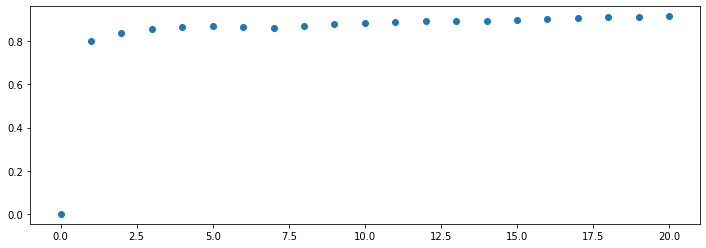

In [56]:
metric_results = run_n_epochs(model, lr, params, 20)

 21:0.9179  22:0.9201  23:0.9206  24:0.9217  25:0.9224  26:0.9235  27:0.9253  28:0.9256  29:0.9269  30:0.9279
 31:0.9280  32:0.9289  33:0.9291  34:0.9303  35:0.9315  36:0.9316  37:0.9318  38:0.9323  39:0.9321  40:0.9325
 41:0.9333  42:0.9333  43:0.9337  44:0.9338  45:0.9343  46:0.9335  47:0.9350  48:0.9352  49:0.9347  50:0.9356
 51:0.9368  52:0.9369  53:0.9374  54:0.9378  55:0.9379  56:0.9382  57:0.9382  58:0.9384  59:0.9385  60:0.9382
 61:0.9385  62:0.9388  63:0.9396  64:0.9399  65:0.9398  66:0.9400  67:0.9406  68:0.9402  69:0.9405  70:0.9416

Last:0.9416


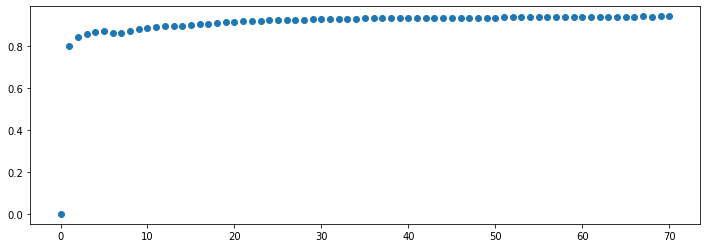

In [58]:
metric_results = run_n_epochs(model, lr, params, 50)

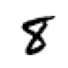

tensor([[8]])

In [59]:
img = valid_tensors_dict[8][49]
show_image(img)
plt.show()
classifier(img.view(28*28).unsqueeze(dim=0))

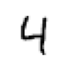

tensor([[39]])

In [63]:
img = valid_tensors_dict[4][1]
show_image(img)
plt.show()

classifier(img.view(28*28).unsqueeze(dim=0))

In [65]:
# Improvement 2 model by introducing ReLu and three layers

In [66]:
def init_params(size, std=1.0): 
    return (torch.randn(size)*std).requires_grad_()

w1 = init_params((28*28, 250))
b1 = init_params(250)

w2 = init_params((250, 100))
b2 = init_params(100)

w3 = init_params((100, 10))
b3 = init_params(10)

w1.shape, b1.shape, w2.shape, b2.shape, w3.shape, b3.shape

(torch.Size([784, 250]),
 torch.Size([250]),
 torch.Size([250, 100]),
 torch.Size([100]),
 torch.Size([100, 10]),
 torch.Size([10]))

In [67]:
activ1 = nn.ReLU()

def linear1(xb):
    outputs =  xb @ w1 + b1
    return activ1(outputs)

def linear2(xb):
    outputs =  xb @ w2 + b2
    return activ1(outputs)

def linear3(xb):
    """https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.log_softmax"""
    outputs =  xb @ w3 + b3
    probs = torch.log_softmax(outputs, dim=1)
    # probs = F.log_softmax(outputs, dim=1)

    return probs

def model(xb):
    xb = linear1(xb)
    xb = linear2(xb)
    xb = linear3(xb)
    return xb

def classifier(xb):
    xb = model(xb)
    return xb.argmax(dim=1).unsqueeze(dim=1)


In [68]:
loss_fct = F.nll_loss

def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = loss_fct(preds, yb.squeeze())
    # print(loss)
    loss.backward()

def train_epoch(model, lr, params):
    for xb, yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad * lr
            p.grad.zero_()

def batch_accuracy(xb, yb):
    accuracy = torch.eq(xb, yb).sum() / xb.shape[0]
    return accuracy

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb, yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [69]:
from math import log10

def run_n_epochs(model, lr, params, n_epochs):
    trigger = 10**(int(log10(n_epochs))-1)
    cols = 10
    starting_i = metric_results['epochs'][-1] + 1
    for i in range(starting_i, starting_i + n_epochs):
        train_epoch(model, lr, params)
        if i%trigger == 0:
            v = validate_epoch(classifier)

            metric_results['epochs'].append(i)
            metric_results['values'].append(v)
            
            end_str = '\n' if i//trigger%cols == 0 else ' ' 
            print(f"{i:3d}:{v:1.4f}", end=end_str)
    print(f"\nLast:{v:1.4f}")
    fig, ax = plt.subplots(1, 1, figsize=(12,4))
    ax.scatter(metric_results['epochs'], metric_results['values'])
    return metric_results

In [70]:
shuffle(dset)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

w1 = init_params((28*28, 250))
b1 = init_params(250)
w2 = init_params((250, 100))
b2 = init_params(100)
w3 = init_params((100, 10))
b3 = init_params(10)

lr = 1
params = w1, b1, w2, b2

metric_results = {}
metric_results['epochs'] = [0]
metric_results['values'] = [0]

train_epoch(model, lr, params)
validate_epoch(classifier)

0.3243

  1:0.3480   2:0.3650   3:0.3663   4:0.3728   5:0.3752   6:0.4134   7:0.4322   8:0.4485   9:0.4619  10:0.4544
 11:0.4790  12:0.5240  13:0.5176  14:0.5300  15:0.5301  16:0.5372  17:0.5603  18:0.4618  19:0.4730  20:0.4816

Last:0.4816


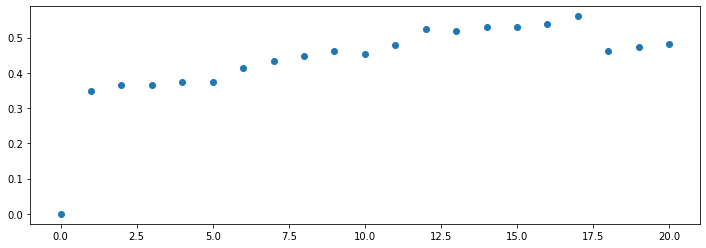

In [71]:
metric_results = run_n_epochs(model, lr, params, 20)

 21:0.4864  22:0.4864  23:0.4871  24:0.4886  25:0.4888  26:0.4902  27:0.4911  28:0.4918  29:0.4914  30:0.4910
 31:0.4916  32:0.4943  33:0.4947  34:0.4961  35:0.4959  36:0.4970  37:0.4990  38:0.4984  39:0.5020  40:0.5033

Last:0.5033


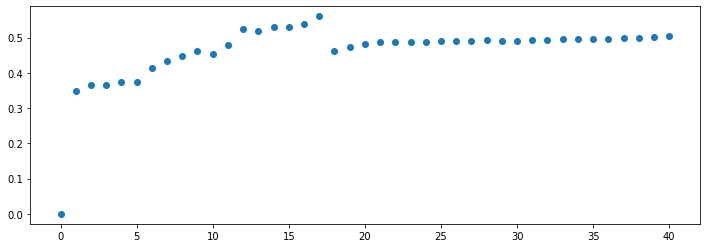

In [72]:
lr =0.1
metric_results = run_n_epochs(model, lr, params, 20)

 41:0.5105  42:0.5239  43:0.5476  44:0.5951  45:0.5820  46:0.5761  47:0.6459  48:0.5898  49:0.6715  50:0.6802
 51:0.6868  52:0.6623  53:0.6961  54:0.6915  55:0.6951  56:0.7008  57:0.6994  58:0.6936  59:0.6912  60:0.6885

Last:0.6885


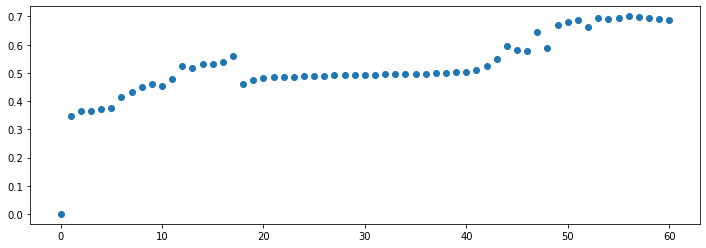

In [73]:
lr =0.5
metric_results = run_n_epochs(model, lr, params, 20)

 61:0.6909  62:0.6960  63:0.6886  64:0.6713  65:0.7015  66:0.7001  67:0.7104  68:0.7204  69:0.7204  70:0.7233
 71:0.6400  72:0.7101  73:0.7183  74:0.7231  75:0.7313  76:0.7436  77:0.7556  78:0.7707  79:0.7692  80:0.7945

Last:0.7945


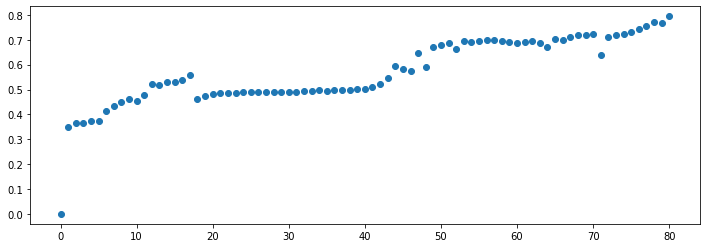

In [74]:
lr =0.8
metric_results = run_n_epochs(model, lr, params, 20)

 81:0.7914  82:0.8048  83:0.7901  84:0.8078  85:0.8192  86:0.8180  87:0.8173  88:0.8069  89:0.8126  90:0.8170
 91:0.8097  92:0.8274  93:0.8401  94:0.8443  95:0.8467  96:0.8468  97:0.8360  98:0.8206  99:0.8466 100:0.8571
101:0.8428 102:0.8650 103:0.8602 104:0.8648 105:0.8527 106:0.8455 107:0.8514 108:0.8498 109:0.8292 110:0.8291
111:0.8508 112:0.8514 113:0.8313 114:0.8001 115:0.8245 116:0.8508 117:0.8584 118:0.8403 119:0.8596 120:0.8455
121:0.8328 122:0.8620 123:0.8704 124:0.8305 125:0.8611 126:0.8352 127:0.8276 128:0.8061 129:0.8303 130:0.8265

Last:0.8265


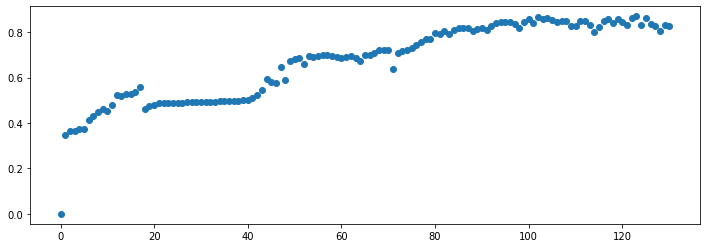

In [75]:
lr =0.8
metric_results = run_n_epochs(model, lr, params, 50)

131:0.8385 132:0.8331 133:0.8198 134:0.8307 135:0.8210 136:0.8285 137:0.8319 138:0.8238 139:0.8226 140:0.8245
141:0.8334 142:0.8273 143:0.8404 144:0.8099 145:0.8443 146:0.8283 147:0.8373 148:0.8604 149:0.8346 150:0.8741

Last:0.8741


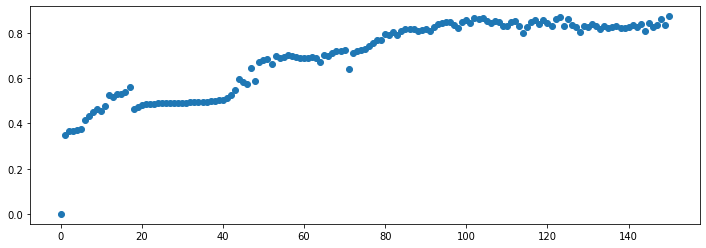

In [76]:
lr =0.7
metric_results = run_n_epochs(model, lr, params, 20)

151:0.8629 152:0.8890 153:0.8435 154:0.8398 155:0.8861 156:0.8744 157:0.8371 158:0.8469 159:0.8381 160:0.8871
161:0.8915 162:0.8548 163:0.8938 164:0.8901 165:0.8980 166:0.8983 167:0.8987 168:0.8980 169:0.8945 170:0.9028

Last:0.9028


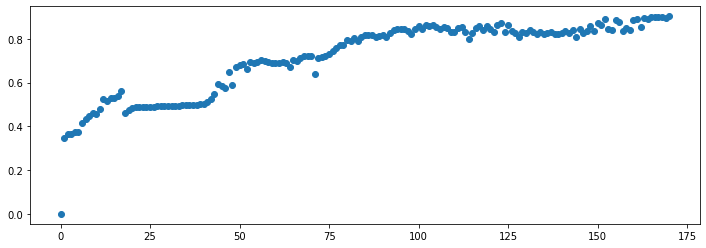

In [77]:
lr =0.7
metric_results = run_n_epochs(model, lr, params, 20)

171:0.8973 172:0.9009 173:0.9005 174:0.8988 175:0.9010 176:0.8965 177:0.8975 178:0.8997 179:0.9011 180:0.8992
181:0.9019 182:0.8991 183:0.9001 184:0.9010 185:0.9009 186:0.9025 187:0.9021 188:0.9006 189:0.9016 190:0.9012

Last:0.9012


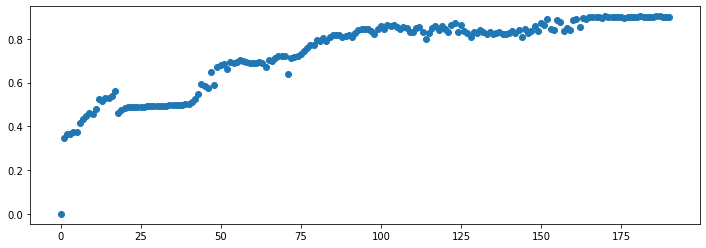

In [78]:
lr =0.6
metric_results = run_n_epochs(model, lr, params, 20)

191:0.9025 192:0.9046 193:0.9049 194:0.9060 195:0.9050 196:0.9046 197:0.9049 198:0.9048 199:0.9049 200:0.9038
201:0.9044 202:0.9042 203:0.9063 204:0.9054 205:0.9058 206:0.9050 207:0.9051 208:0.9065 209:0.9046 210:0.9066

Last:0.9066


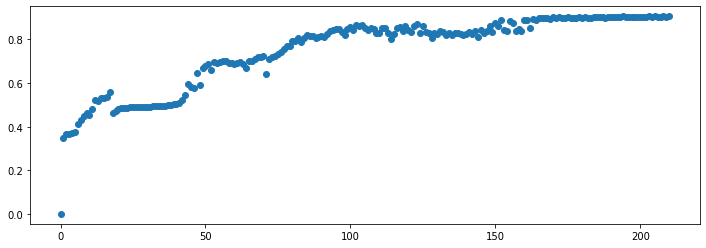

In [79]:
lr =0.5
metric_results = run_n_epochs(model, lr, params, 20)

211:0.9077 212:0.9087 213:0.9077 214:0.9075 215:0.9085 216:0.9081 217:0.9083 218:0.9083 219:0.9076 220:0.9078
221:0.9078 222:0.9067 223:0.9072 224:0.9076 225:0.9086 226:0.9083 227:0.9080 228:0.9076 229:0.9073 230:0.9075

Last:0.9075


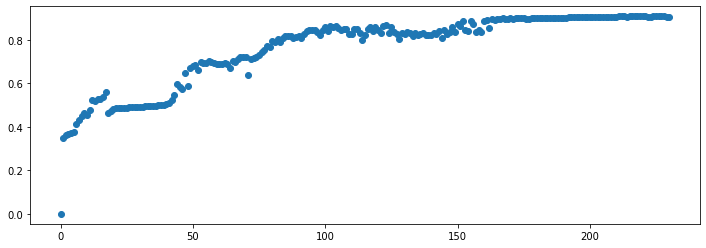

In [80]:
lr =0.4
metric_results = run_n_epochs(model, lr, params, 20)

231:0.9116 232:0.9116 233:0.9114 234:0.9114 235:0.9115 236:0.9112 237:0.9116 238:0.9113 239:0.9112 240:0.9112
241:0.9115 242:0.9115 243:0.9117 244:0.9117 245:0.9115 246:0.9113 247:0.9116 248:0.9116 249:0.9115 250:0.9118

Last:0.9118


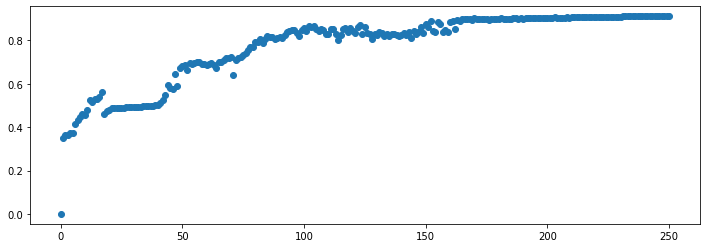

In [81]:
lr =0.1
metric_results = run_n_epochs(model, lr, params, 20)

251:0.9123 252:0.9122 253:0.9121 254:0.9121 255:0.9123 256:0.9123 257:0.9122 258:0.9123 259:0.9122 260:0.9123
261:0.9123 262:0.9125 263:0.9125 264:0.9127 265:0.9127 266:0.9127 267:0.9127 268:0.9127 269:0.9127 270:0.9127

Last:0.9127


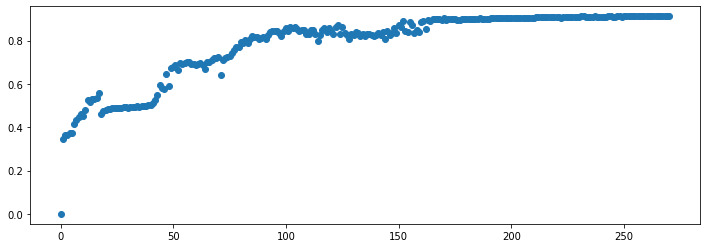

In [82]:
lr =0.01
metric_results = run_n_epochs(model, lr, params, 20)

271:0.9126 272:0.9124 273:0.9125 274:0.9126 275:0.9125 276:0.9126 277:0.9126 278:0.9126 279:0.9126 280:0.9126
281:0.9126 282:0.9126 283:0.9126 284:0.9126 285:0.9125 286:0.9125 287:0.9125 288:0.9125 289:0.9125 290:0.9125

Last:0.9125


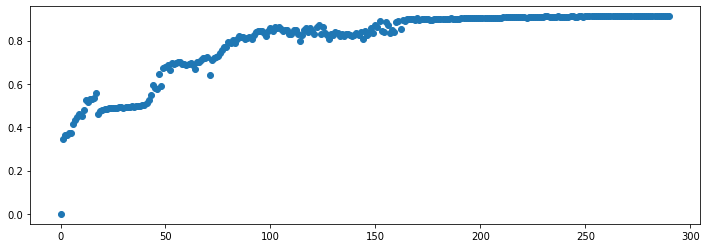

In [83]:
lr =0.001
metric_results = run_n_epochs(model, lr, params, 20)

291:0.9125 292:0.9125 293:0.9125 294:0.9125 295:0.9125 296:0.9125 297:0.9125 298:0.9124 299:0.9124 300:0.9124
301:0.9124 302:0.9124 303:0.9124 304:0.9124 305:0.9124 306:0.9124 307:0.9124 308:0.9124 309:0.9124 310:0.9124

Last:0.9124


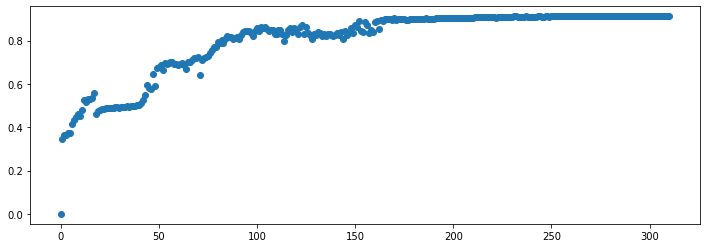

In [84]:
lr =0.0001
metric_results = run_n_epochs(model, lr, params, 20)

311:0.9124 312:0.9124 313:0.9124 314:0.9124 315:0.9124 316:0.9124 317:0.9124 318:0.9124 319:0.9124 320:0.9124
321:0.9124 322:0.9124 323:0.9124 324:0.9124 325:0.9124 326:0.9124 327:0.9124 328:0.9124 329:0.9124 330:0.9124

Last:0.9124


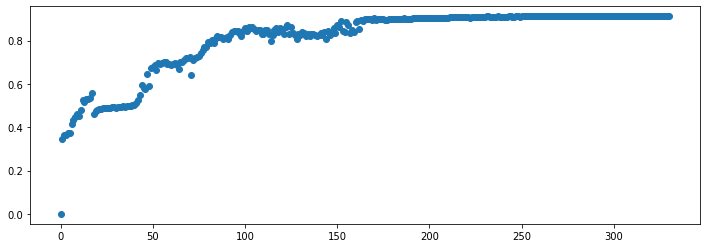

In [85]:
lr =0.00001
metric_results = run_n_epochs(model, lr, params, 20)

331:0.9124 332:0.9124 333:0.9124 334:0.9124 335:0.9124 336:0.9124 337:0.9124 338:0.9124 339:0.9124 340:0.9124
341:0.9124 342:0.9124 343:0.9124 344:0.9124 345:0.9124 346:0.9124 347:0.9124 348:0.9124 349:0.9124 350:0.9124

Last:0.9124


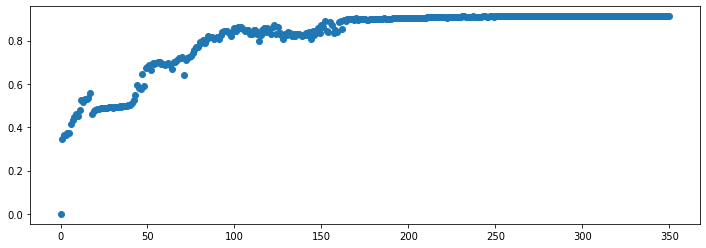

In [86]:
lr =0.000001
metric_results = run_n_epochs(model, lr, params, 20)

In [ ]:
## Change the number of nodes in each layer

In [89]:
shuffle(dset)
dl = DataLoader(dset, batch_size=256)
valid_dl = DataLoader(valid_dset, batch_size=5)

w1 = init_params((28*28, 128))
b1 = init_params(128)
w2 = init_params((128, 64))
b2 = init_params(64)
w3 = init_params((64, 10))
b3 = init_params(10)

lr = 1
params = w1, b1, w2, b2

metric_results = {}
metric_results['epochs'] = [0]
metric_results['values'] = [0]

train_epoch(model, lr, params)
validate_epoch(classifier)

0.3312

  1:0.2946   2:0.4049   3:0.4054   4:0.4371   5:0.4675   6:0.4676   7:0.4679   8:0.4246   9:0.4756  10:0.4747
 11:0.5107  12:0.5380  13:0.5475  14:0.5444  15:0.5556  16:0.4854  17:0.5788  18:0.5041  19:0.5738  20:0.5811

Last:0.5811


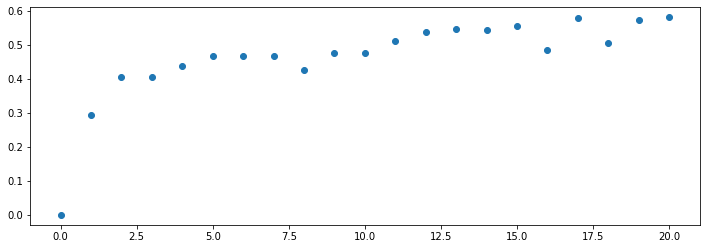

In [90]:
metric_results = run_n_epochs(model, lr, params, 20)

 21:0.6449  22:0.6140  23:0.6522  24:0.6861  25:0.6958  26:0.7101  27:0.7048  28:0.7162  29:0.6924  30:0.6995
 31:0.7167  32:0.7188  33:0.7094  34:0.6871  35:0.6946  36:0.7135  37:0.7415  38:0.7488  39:0.7340  40:0.7347

Last:0.7347


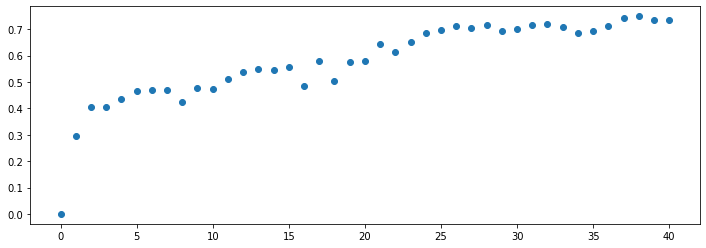

In [91]:
lr=0.5
metric_results = run_n_epochs(model, lr, params, 20)

 41:0.6792  42:0.6520  43:0.6392  44:0.7126  45:0.6647  46:0.7090  47:0.7483  48:0.7511  49:0.5518  50:0.7571
 51:0.7747  52:0.7561  53:0.7541  54:0.7680  55:0.8048  56:0.7490  57:0.7369  58:0.7883  59:0.8099  60:0.7993

Last:0.7993


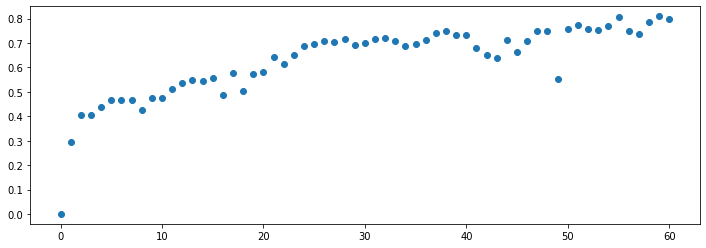

In [92]:
lr=0.8
metric_results = run_n_epochs(model, lr, params, 20)

 61:0.8102  62:0.8145  63:0.8103  64:0.8198  65:0.8024  66:0.8079  67:0.8135  68:0.8149  69:0.8152  70:0.8243
 71:0.8276  72:0.8293  73:0.8263  74:0.8301  75:0.8349  76:0.8109  77:0.8137  78:0.8198  79:0.8206  80:0.8322

Last:0.8322


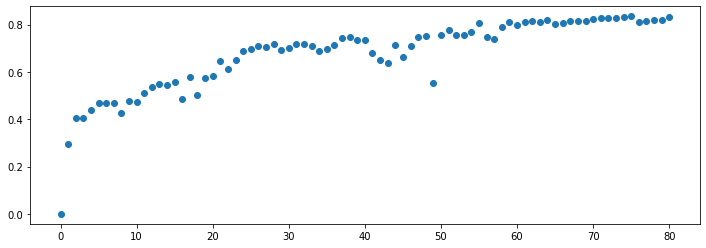

In [93]:
lr=0.7
metric_results = run_n_epochs(model, lr, params, 20)

 81:0.8274  82:0.8301  83:0.8338  84:0.8269  85:0.8409  86:0.8403  87:0.8236  88:0.8337  89:0.8497  90:0.8297
 91:0.8530  92:0.8592  93:0.8582  94:0.8606  95:0.8596  96:0.8608  97:0.8628  98:0.8586  99:0.8647 100:0.8625

Last:0.8625


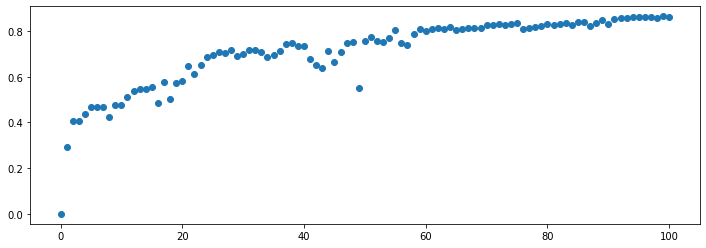

In [94]:
lr=0.7
metric_results = run_n_epochs(model, lr, params, 20)

101:0.8701 102:0.8647 103:0.8680 104:0.8686 105:0.8712 106:0.8329 107:0.8716 108:0.8711 109:0.8671 110:0.8664
111:0.8781 112:0.8735 113:0.8780 114:0.8761 115:0.8771 116:0.8791 117:0.8815 118:0.8799 119:0.8731 120:0.8806

Last:0.8806


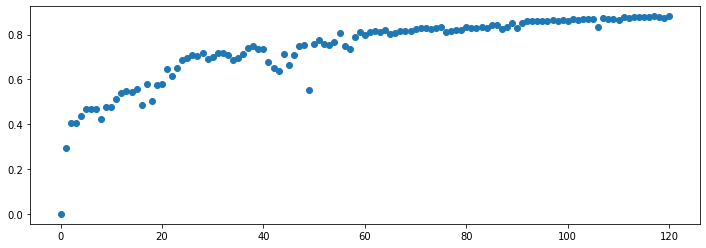

In [95]:
lr=0.7
metric_results = run_n_epochs(model, lr, params, 20)

121:0.8802 122:0.8826 123:0.8821 124:0.8838 125:0.8808 126:0.8821 127:0.8849 128:0.8828 129:0.8833 130:0.8806
131:0.8823 132:0.8845 133:0.8813 134:0.8857 135:0.8856 136:0.8820 137:0.8817 138:0.8824 139:0.8814 140:0.8836

Last:0.8836


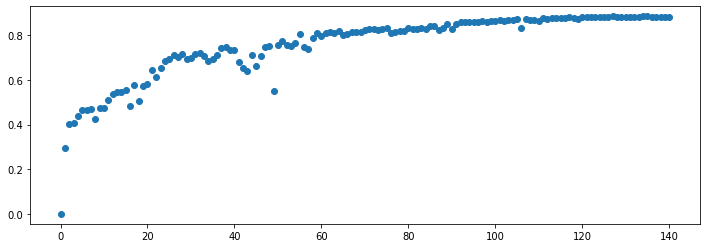

In [96]:
lr=0.6
metric_results = run_n_epochs(model, lr, params, 20)

141:0.8907 142:0.8906 143:0.8904 144:0.8901 145:0.8900 146:0.8917 147:0.8900 148:0.8929 149:0.8911 150:0.8915
151:0.8931 152:0.8901 153:0.8915 154:0.8930 155:0.8926 156:0.8913 157:0.8894 158:0.8896 159:0.8904 160:0.8902

Last:0.8902


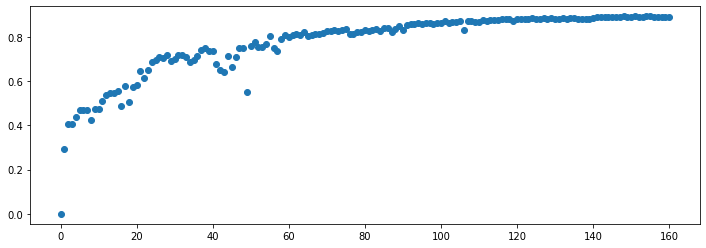

In [97]:
lr=0.4
metric_results = run_n_epochs(model, lr, params, 20)

161:0.8934 162:0.8933 163:0.8937 164:0.8935 165:0.8940 166:0.8939 167:0.8936 168:0.8938 169:0.8940 170:0.8942
171:0.8941 172:0.8942 173:0.8940 174:0.8939 175:0.8941 176:0.8947 177:0.8942 178:0.8943 179:0.8940 180:0.8941

Last:0.8941


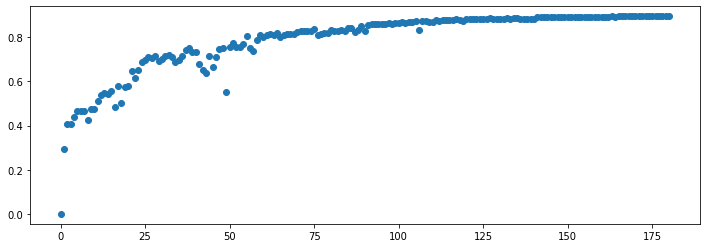

In [98]:
lr=0.2
metric_results = run_n_epochs(model, lr, params, 20)

181:0.8958 182:0.8961 183:0.8961 184:0.8959 185:0.8959 186:0.8959 187:0.8960 188:0.8959 189:0.8959 190:0.8964
191:0.8962 192:0.8965 193:0.8957 194:0.8962 195:0.8959 196:0.8958 197:0.8963 198:0.8959 199:0.8956 200:0.8959

Last:0.8959


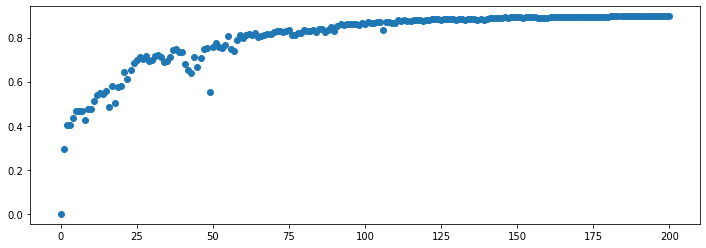

In [99]:
lr=0.1
metric_results = run_n_epochs(model, lr, params, 20)

201:0.8962 202:0.8962 203:0.8964 204:0.8961 205:0.8964 206:0.8962 207:0.8966 208:0.8964 209:0.8965 210:0.8967
211:0.8966 212:0.8967 213:0.8967 214:0.8966 215:0.8967 216:0.8969 217:0.8969 218:0.8967 219:0.8968 220:0.8968

Last:0.8968


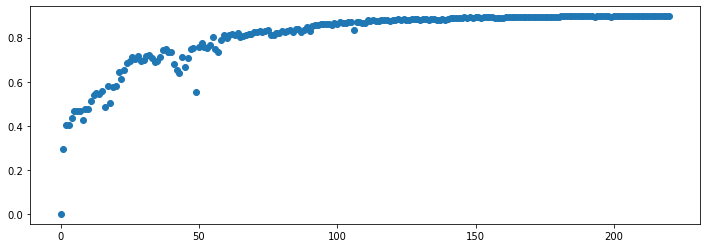

In [100]:
lr=0.01
metric_results = run_n_epochs(model, lr, params, 20)

221:0.8968 222:0.8967 223:0.8968 224:0.8968 225:0.8969 226:0.8969 227:0.8969 228:0.8969 229:0.8969 230:0.8969
231:0.8970 232:0.8970 233:0.8970 234:0.8970 235:0.8971 236:0.8971 237:0.8971 238:0.8971 239:0.8971 240:0.8971

Last:0.8971


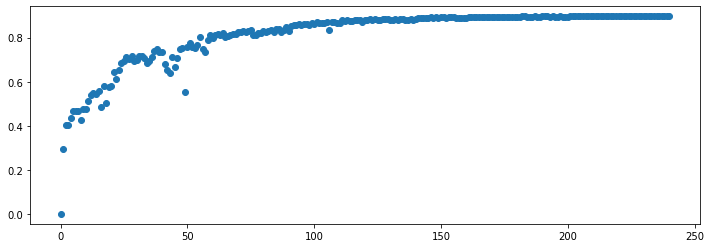

In [101]:
lr=0.001
metric_results = run_n_epochs(model, lr, params, 20)

241:0.8971 242:0.8971 243:0.8971 244:0.8971 245:0.8971 246:0.8971 247:0.8971 248:0.8971 249:0.8971 250:0.8971
251:0.8971 252:0.8971 253:0.8971 254:0.8971 255:0.8971 256:0.8971 257:0.8971 258:0.8971 259:0.8971 260:0.8971

Last:0.8971


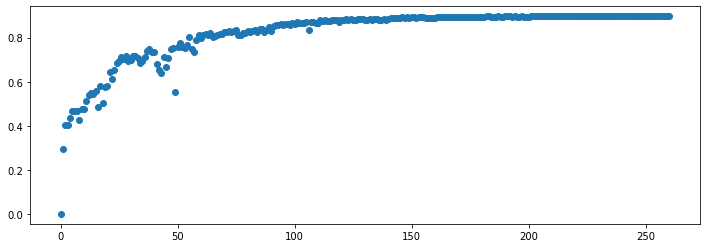

In [102]:
lr=0.0001
metric_results = run_n_epochs(model, lr, params, 20)

261:0.8971 262:0.8971 263:0.8971 264:0.8971 265:0.8971 266:0.8971 267:0.8971 268:0.8971 269:0.8971 270:0.8971
271:0.8971 272:0.8971 273:0.8971 274:0.8971 275:0.8971 276:0.8971 277:0.8971 278:0.8971 279:0.8971 280:0.8971

Last:0.8971


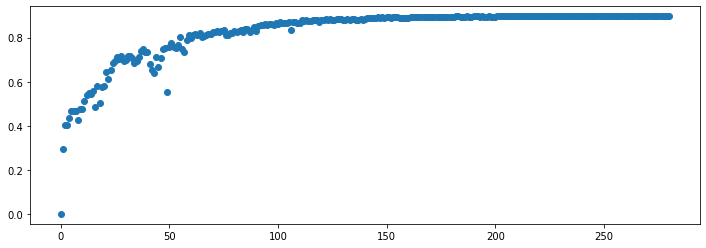

In [103]:
lr=0.00001
metric_results = run_n_epochs(model, lr, params, 20)